# DataFrame 2: Episodios
Lista episodios

Ratings (2)

In [1]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_episodes = pd.read_csv('../data/episodes.csv')
df_episodes

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,Running Time (Minutes),Directed by,Written by,Original Air Date,U.S. Viewers (Millions),Music by,Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Ordered,Filming Duration,Novel(s) Adapted,Synopsis
0,1,1,1,Winter Is Coming,61,Tim Van Patten,"David Benioff, D. B. Weiss",17-Apr-2011,2.22,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.9,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"North of the Seven Kingdoms of Westeros, Night..."
1,1,2,2,The Kingsroad,55,Tim Van Patten,"David Benioff, D. B. Weiss",24-Apr-2011,2.20,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.6,100,8.9,"March 2, 2010",Second half of 2010,A Game of Thrones,"Ned, the new Hand of the King, travels to King..."
2,1,3,3,Lord Snow,57,Brian Kirk,"David Benioff, D. B. Weiss",1-May-2011,2.44,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.5,81,8.7,"March 2, 2010",Second half of 2010,A Game of Thrones,Ned attends the King's Small Council and learn...
3,1,4,4,"Cripples, Bastards, and Broken Things",55,Brian Kirk,Bryan Cogman,8-May-2011,2.45,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.6,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"While returning to King's Landing, Tyrion stop..."
4,1,5,5,The Wolf and the Lion,54,Brian Kirk,"David Benioff, D. B. Weiss",15-May-2011,2.58,Ramin Djawadi,Marco Pontecorvo,Frances Parker,9.0,95,9.0,"March 2, 2010",Second half of 2010,A Game of Thrones,"King Robert's eunuch spy, Varys, has uncovered..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,8,2,69,A Knight of the Seven Kingdoms,57,David Nutter,Bryan Cogman,21-Apr-2019,10.29,Ramin Djawadi,David Franco,Crispin Green,7.9,87,5.9,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,Jaime reveals Cersei's deception to the Targar...
69,8,3,70,The Long Night,81,Miguel Sapochnik,"David Benioff, D. B. Weiss",28-Apr-2019,12.02,Ramin Djawadi,Fabian Wagner,Tim Porter,7.5,74,4.2,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,The living meet the Army of the Dead outside W...
70,8,4,71,The Last of the Starks,77,David Nutter,"David Benioff, D. B. Weiss",5-May-2019,11.80,Ramin Djawadi,David Franco,Katie Weiland,5.5,58,2.9,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,"The survivors mourn, burn the dead and then ce..."
71,8,5,72,The Bells,77,Miguel Sapochnik,"David Benioff, D. B. Weiss",12-May-2019,12.48,Ramin Djawadi,Fabian Wagner,Tim Porter,6.0,49,3.4,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,Varys urges Jon to advance his claim to the th...


In [3]:
df_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Season                               73 non-null     int64  
 1   No. of Episode (Season)              73 non-null     int64  
 2   No. of Episode (Overall)             73 non-null     int64  
 3   Title of the Episode                 73 non-null     object 
 4   Running Time (Minutes)               73 non-null     int64  
 5   Directed by                          73 non-null     object 
 6   Written by                           73 non-null     object 
 7   Original Air Date                    73 non-null     object 
 8   U.S. Viewers (Millions)              73 non-null     float64
 9   Music by                             73 non-null     object 
 10  Cinematography by                    73 non-null     object 
 11  Editing by                        

Voy a eliminar las columnas con muchos nulos y las columnas que no me interesan para el EDA:

In [4]:
df_episodes_clean = df_episodes.drop(["Ordered","Filming Duration","Original Air Date","Running Time (Minutes)","Directed by","Written by","Music by","Cinematography by","Editing by","Synopsis"], axis=1)
df_episodes_clean

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,U.S. Viewers (Millions),IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Novel(s) Adapted
0,1,1,1,Winter Is Coming,2.22,8.9,100,9.1,A Game of Thrones
1,1,2,2,The Kingsroad,2.20,8.6,100,8.9,A Game of Thrones
2,1,3,3,Lord Snow,2.44,8.5,81,8.7,A Game of Thrones
3,1,4,4,"Cripples, Bastards, and Broken Things",2.45,8.6,100,9.1,A Game of Thrones
4,1,5,5,The Wolf and the Lion,2.58,9.0,95,9.0,A Game of Thrones
...,...,...,...,...,...,...,...,...,...
68,8,2,69,A Knight of the Seven Kingdoms,10.29,7.9,87,5.9,Outline from A Dream of Spring and original co...
69,8,3,70,The Long Night,12.02,7.5,74,4.2,Outline from A Dream of Spring and original co...
70,8,4,71,The Last of the Starks,11.80,5.5,58,2.9,Outline from A Dream of Spring and original co...
71,8,5,72,The Bells,12.48,6.0,49,3.4,Outline from A Dream of Spring and original co...


In [5]:
df_episodes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Season                               73 non-null     int64  
 1   No. of Episode (Season)              73 non-null     int64  
 2   No. of Episode (Overall)             73 non-null     int64  
 3   Title of the Episode                 73 non-null     object 
 4   U.S. Viewers (Millions)              73 non-null     float64
 5   IMDb Rating                          73 non-null     float64
 6   Rotten Tomatoes Rating (Percentage)  73 non-null     int64  
 7   Metacritic Ratings                   73 non-null     float64
 8   Novel(s) Adapted                     73 non-null     object 
dtypes: float64(3), int64(4), object(2)
memory usage: 5.3+ KB


Progreso del rating de los episodios (histograma) de MEtacritics, IMDb y Rotten Tomatoes

In [6]:
#cambiar nombre a columna
df_episodes_clean.rename(columns={"Rotten Tomatoes Rating (Percentage)": "Rotten Tomatoes Rating"}, inplace=True)
df_episodes_clean

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,U.S. Viewers (Millions),IMDb Rating,Rotten Tomatoes Rating,Metacritic Ratings,Novel(s) Adapted
0,1,1,1,Winter Is Coming,2.22,8.9,100,9.1,A Game of Thrones
1,1,2,2,The Kingsroad,2.20,8.6,100,8.9,A Game of Thrones
2,1,3,3,Lord Snow,2.44,8.5,81,8.7,A Game of Thrones
3,1,4,4,"Cripples, Bastards, and Broken Things",2.45,8.6,100,9.1,A Game of Thrones
4,1,5,5,The Wolf and the Lion,2.58,9.0,95,9.0,A Game of Thrones
...,...,...,...,...,...,...,...,...,...
68,8,2,69,A Knight of the Seven Kingdoms,10.29,7.9,87,5.9,Outline from A Dream of Spring and original co...
69,8,3,70,The Long Night,12.02,7.5,74,4.2,Outline from A Dream of Spring and original co...
70,8,4,71,The Last of the Starks,11.80,5.5,58,2.9,Outline from A Dream of Spring and original co...
71,8,5,72,The Bells,12.48,6.0,49,3.4,Outline from A Dream of Spring and original co...


In [7]:
#cambiar valores escala (sobre 10, no %)
df_episodes_clean["Rotten Tomatoes Rating"] = df_episodes_clean["Rotten Tomatoes Rating"] / 10


In [8]:
df_episodes_clean.to_csv("../data_clean/df_episodes_clean.csv", index=False)

In [9]:
df_episodes_clean.iloc[40:50]

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,U.S. Viewers (Millions),IMDb Rating,Rotten Tomatoes Rating,Metacritic Ratings,Novel(s) Adapted
40,5,1,41,The Wars to Come,8.00,8.3,9.6,8.7,"A Feast for Crows, A Dance with Dragons and or..."
41,5,2,42,The House of Black and White,6.81,8.4,9.6,8.9,"A Feast for Crows, A Dance with Dragons and or..."
42,5,3,43,High Sparrow,6.71,8.4,10.0,9.0,"A Feast for Crows, A Dance with Dragons and or..."
43,5,4,44,Sons of the Harpy,6.82,8.5,9.6,6.5,"A Feast for Crows, A Dance with Dragons and or..."
44,5,5,45,Kill the Boy,6.56,8.5,9.4,9.0,"A Feast for Crows, A Dance with Dragons and or..."
45,5,6,46,"Unbowed, Unbent, Unbroken",6.24,7.9,5.4,7.6,"A Feast for Crows, A Dance with Dragons and or..."
46,5,7,47,The Gift,5.40,8.8,8.4,7.8,"A Feast for Crows, A Dance with Dragons and or..."
47,5,8,48,Hardhome,7.01,9.8,10.0,9.1,"A Feast for Crows, A Dance with Dragons and or..."
48,5,9,49,The Dance of Dragons,7.14,9.4,8.3,8.1,"A Feast for Crows, A Dance with Dragons and or..."
49,5,10,50,Mother's Mercy,8.11,9.1,9.2,8.3,"A Feast for Crows, A Dance with Dragons and or..."


In [10]:
df_episodes["Directed by"].nunique()

20

In [11]:
# EN OTRO DF ME SALEN 8!!!!
df_episodes["Written by"].unique()

array(['David Benioff, D. B. Weiss', 'Bryan Cogman',
       'Jane Espenson, David Benioff, D. B. Weiss', 'George R. R. Martin',
       'Vanessa Taylor', 'Dave Hill'], dtype=object)

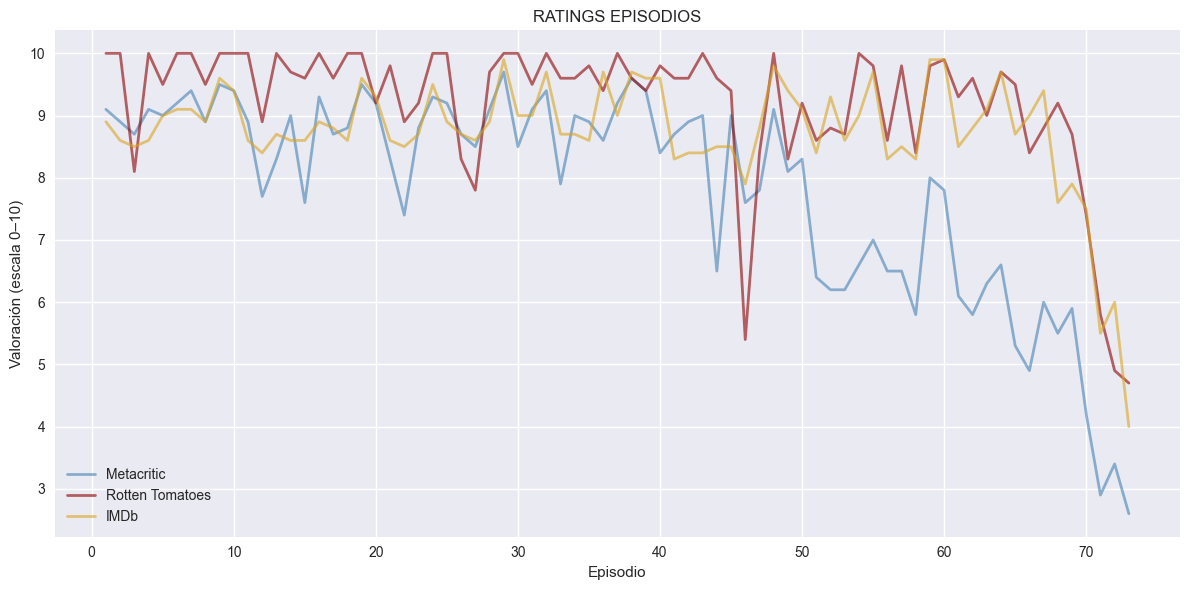

In [22]:
plt.figure(figsize=(12, 6))

plt.plot(df_episodes_clean['No. of Episode (Overall)'], df_episodes_clean['Metacritic Ratings'], 
         color='#4682B4', alpha=0.6, label='Metacritic', linewidth=2)

plt.plot(df_episodes_clean['No. of Episode (Overall)'], df_episodes_clean['Rotten Tomatoes Rating'], 
         color='#8B0000', alpha=0.6, label='Rotten Tomatoes', linewidth=2)

plt.plot(df_episodes_clean['No. of Episode (Overall)'], df_episodes_clean['IMDb Rating'], 
         color='#DAA520', alpha=0.6, label='IMDb', linewidth=2)

plt.xlabel('Episodio')
plt.ylabel('Valoración (escala 0–10)')
plt.title('RATINGS EPISODIOS')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
worstRT1 = df_episodes_clean["Rotten Tomatoes Rating"].iloc[40:50].min()
worstRT1

np.float64(7.8)

In [ ]:
df_episodes_clean.iloc[40:50][df_episodes_clean["Rotten Tomatoes Rating"].iloc[40:50] == worstRT1]


,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,U.S. Viewers (Millions),IMDb Rating,Rotten Tomatoes Rating,Metacritic Ratings,Novel(s) Adapted,Average Rating
26,3,7,27,The Bear and the Maiden Fair,4.84,8.6,7.8,8.5,A Storm of Swords,8.3


In [15]:
worstMC1 = df_episodes_clean["Metacritic Ratings"].iloc[40:50].min()
df_episodes_clean.iloc[40:50][df_episodes_clean["Metacritic Ratings"].iloc[40:50] == worstMC1]

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,U.S. Viewers (Millions),IMDb Rating,Rotten Tomatoes Rating,Metacritic Ratings,Novel(s) Adapted
43,5,4,44,Sons of the Harpy,6.82,8.5,9.6,6.5,"A Feast for Crows, A Dance with Dragons and or..."


El episodio peor valorado por rotten tomatoes dentro de una temporada en general valorada muy positivamente es el E6T5, en el cual Ramsay Bolton viola a Sansa Stark (Unbowed, Unbent, Unbroken).

El peor valorado en ese caso, según Metacritic, es el E4T5: Sons of the Harpy

IMBd no tiene ninguna bajada especialmente pronunciada hasta el final, donde las malas valoraciones coinciden en las 3 columnas

grafica ratings y viewers. comparr si es igual que en episodios y muertes. Para eso, 1º saco la media de las 3 opiniones

In [16]:
df_episodes_clean["Average Rating"] = df_episodes_clean[["IMDb Rating", "Metacritic Ratings", "Rotten Tomatoes Rating"]].mean(axis=1)
df_episodes_clean

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,U.S. Viewers (Millions),IMDb Rating,Rotten Tomatoes Rating,Metacritic Ratings,Novel(s) Adapted,Average Rating
0,1,1,1,Winter Is Coming,2.22,8.9,10.0,9.1,A Game of Thrones,9.333333
1,1,2,2,The Kingsroad,2.20,8.6,10.0,8.9,A Game of Thrones,9.166667
2,1,3,3,Lord Snow,2.44,8.5,8.1,8.7,A Game of Thrones,8.433333
3,1,4,4,"Cripples, Bastards, and Broken Things",2.45,8.6,10.0,9.1,A Game of Thrones,9.233333
4,1,5,5,The Wolf and the Lion,2.58,9.0,9.5,9.0,A Game of Thrones,9.166667
...,...,...,...,...,...,...,...,...,...,...
68,8,2,69,A Knight of the Seven Kingdoms,10.29,7.9,8.7,5.9,Outline from A Dream of Spring and original co...,7.500000
69,8,3,70,The Long Night,12.02,7.5,7.4,4.2,Outline from A Dream of Spring and original co...,6.366667
70,8,4,71,The Last of the Starks,11.80,5.5,5.8,2.9,Outline from A Dream of Spring and original co...,4.733333
71,8,5,72,The Bells,12.48,6.0,4.9,3.4,Outline from A Dream of Spring and original co...,4.766667


In [17]:
df_episodes_clean.to_csv("../data_clean/df_episodes_clean.csv", index=False)

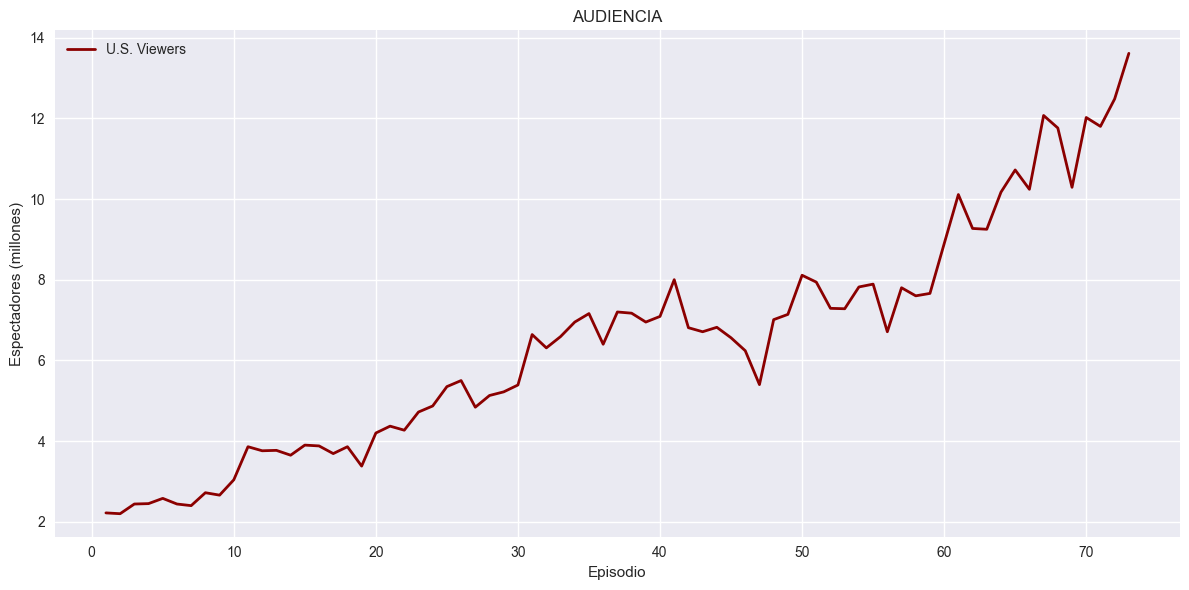

In [26]:
plt.figure(figsize=(12, 6))
"""
plt.plot(df_episodes_clean['No. of Episode (Overall)'], df_episodes_clean['Average Rating'], 
         color='blue', alpha=0.6, label='Average Rating', linewidth=2)"""

plt.plot(df_episodes_clean['No. of Episode (Overall)'], df_episodes_clean['U.S. Viewers (Millions)'], 
         color="#8B0000", alpha=1, label='U.S. Viewers', linewidth=2)



plt.xlabel('Episodio')
plt.ylabel('Espectadores (millones)')
plt.title('AUDIENCIA')
plt.legend()
plt.tight_layout()
plt.show()

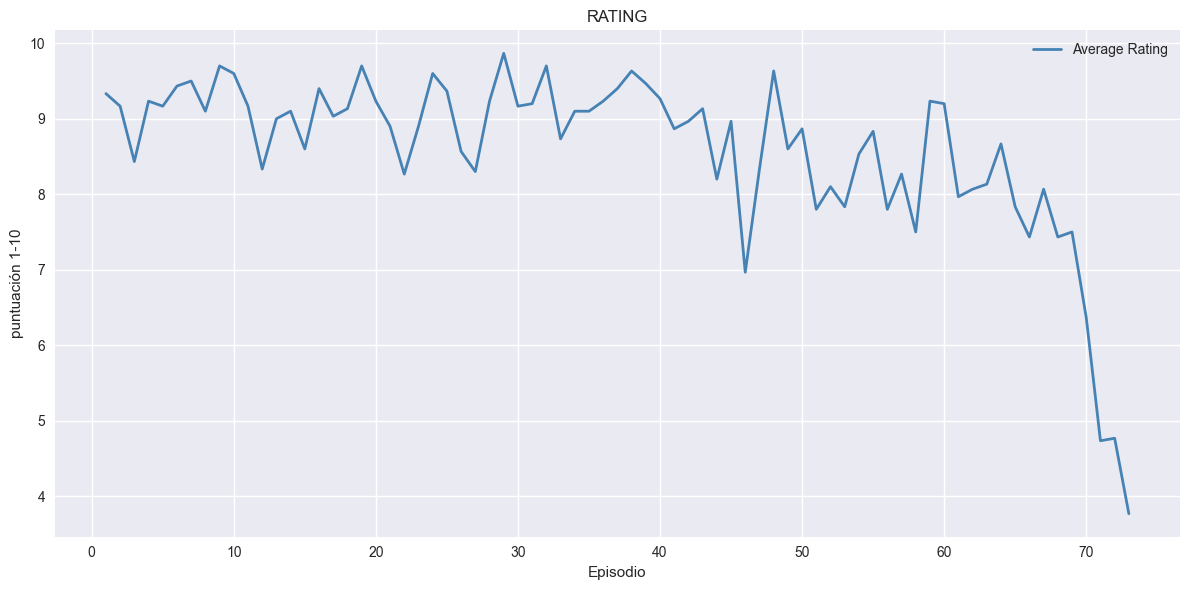

In [27]:
plt.figure(figsize=(12, 6))

plt.plot(df_episodes_clean['No. of Episode (Overall)'], df_episodes_clean['Average Rating'], 
         color="#4682B4", alpha=1, label='Average Rating', linewidth=2)





plt.xlabel('Episodio')
plt.ylabel('puntuación 1-10')
plt.title('RATING')
plt.legend()
plt.tight_layout()
plt.show()

a pesar de que la puntuación al final descenció, los espectadores no dejaron de subir